source https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

Install necessary modules:

In [65]:
%pip install pandas
import pandas as pd

%pip install numpy
import numpy as np

%pip install scikit-learn
import sklearn

%pip install seaborn
import seaborn as sns

%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Turn our csv files into pandas DataFrames:

In [12]:
true_df = pd.read_csv('True.csv', delimiter=',')
fake_df = pd.read_csv('Fake.csv', delimiter=',')

In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [29]:
print(f"The dimensions of this table are: {true_df.shape[0]} rows by {true_df.shape[1]} columns.")


The dimensions of this table are: 21417 rows by 4 columns.


In [8]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [30]:
print(f"The dimensions of this table are: {fake_df.shape[0]} rows by {fake_df.shape[1]} columns.")

The dimensions of this table are: 23481 rows by 4 columns.


Check for null values:

In [20]:
print(f"Are there no null values in true_df (True/False): {all([x==0 for x in true_df.isnull().sum()])}")

Are there no null values (True/False): True


In [31]:
print(f"Are there no null values in fake_df (True/False): {all([x==0 for x in fake_df.isnull().sum()])}")

Are there no null values in fake_df (True/False): True


Check the data tyes of the columns


In pandas, columns that contain strings are stored with the dtype `object`. They are infact all `str` type.

In [50]:
print("Datatypes of true:")
print(true_df.dtypes)
print()
print("Datatypes of fake:")
print(fake_df.dtypes)


Datatypes of true:
title      object
text       object
subject    object
date       object
label       int64
dtype: object

Datatypes of fake:
title      object
text       object
subject    object
date       object
label       int64
dtype: object


We concatenate the two dataframes together and add an column `label` which has `1` for true news articles and `0` for fakes ones for our supervised learning model.

In [32]:
true_df["label"] = 1 
fake_df["label"] = 0 

In [33]:
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)


In [14]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [39]:
empty_titles = df[df["title"].str.strip() == ""]
print(f"Are there any empty strings in the new's articles headlines column? (True/False): {empty_titles.shape[0]>0}")

Are there any empty strings in the new's articles headlines column? (True/False): False


In [42]:
empty_text = df[df["text"].str.strip() == ""]
print(f"Are there any empty strings in the new's article text column? (True/False): {empty_text.shape[0]>0}")
empty_text

Are there any empty strings in the new's article text column? (True/False): True


,title,text,subject,date,label
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",1
32340,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0
32607,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",0
32642,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",0
...,...,...,...,...,...
43233,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",0
43243,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0
43244,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0
43274,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0


In [44]:
empty_subject = df[df["subject"].str.strip() == ""]
print(f"Are there any empty strings in the new's article subject column? (True/False): {empty_subject.shape[0]>0}")

Are there any empty strings in the new's article subject column? (True/False): False


In [47]:
empty_date = df[df["date"].str.strip() == ""]
print(f"Are there any empty strings in the new's article date column? (True/False): {empty_date.shape[0]>0}")

Are there any empty strings in the new's article date column? (True/False): False


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Convert raw text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This helps represent the importance of words relative to the corpus, transforming text into a format that can be used by the Naïve Bayes classifier. We also remove English stop words to reduce noise.



In [57]:
# Select text and labels
X_text = df["text"]  # Features (news article content)
y = df["label"]  # Labels (1 = Real, 0 = Fake)

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")  
X = vectorizer.fit_transform(X_text)

Split the dataset into training (80%) and testing (20%) sets.

In [58]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


Train the MultinomialNB classifier on the TF-IDF-transformed training data. Laplace smoothing (alpha=1) is applied to handle zero probabilities - they are replaced with extremely small (but nonzero) values. 

In [62]:
# Train Naïve Bayes Model
model = MultinomialNB(alpha = 1)  # Laplace smoothing applied
model.fit(X_train, y_train)

MultinomialNB(alpha=1)

Converting log probabilities to actual probabilities helps us understand the conditional probability of each word given the news category (fake or real). This tells us which words are most influential for each class.

In [63]:
# Get log probabilities learned by Naïve Bayes
log_probs = model.feature_log_prob_

# Convert log probabilities to actual probabilities
probs = np.exp(log_probs)

# Get vocabulary (word list)
feature_names = vectorizer.get_feature_names_out()
priors = np.exp(model.class_log_prior_)

# Print actual prior probabilities
print("Prior Probabilities (P(Y)):")
print(f"P(Real) = {priors[1]:.4f}")
print(f"P(Fake) = {priors[0]:.4f}")
# View probabilities of first 10 words
for i in range(10):
    print(f"Word: {feature_names[i]}")
    print(f"P(word | Fake): {probs[0, i]:.6f}")
    print(f"P(word | Real): {probs[1, i]:.6f}")
    print("------")

Prior Probabilities (P(Y)):
P(Real) = 0.4763
P(Fake) = 0.5237
Word: 00
P(word | Fake): 0.000109
P(word | Real): 0.000014
------
Word: 000
P(word | Fake): 0.000348
P(word | Real): 0.000446
------
Word: 0000
P(word | Fake): 0.000005
P(word | Real): 0.000006
------
Word: 00000017
P(word | Fake): 0.000004
P(word | Real): 0.000004
------
Word: 00004
P(word | Fake): 0.000003
P(word | Real): 0.000004
------
Word: 000048
P(word | Fake): 0.000003
P(word | Real): 0.000004
------
Word: 000063
P(word | Fake): 0.000003
P(word | Real): 0.000004
------
Word: 00007
P(word | Fake): 0.000004
P(word | Real): 0.000004
------
Word: 000270
P(word | Fake): 0.000003
P(word | Real): 0.000004
------
Word: 00042
P(word | Fake): 0.000003
P(word | Real): 0.000004
------


The classification report details precision, recall, and F1-score for both classes, while the confusion matrix provides a breakdown of correct and incorrect predictions.

Model Accuracy: 0.9375

Classification Report:



,precision,recall,f1-score,support
0,0.935737,0.944754,0.940224,4670.000000
1,0.939508,0.929698,0.934577,4310.000000
accuracy,0.937528,0.937528,0.937528,0.937528
macro avg,0.937622,0.937226,0.937401,8980.000000
weighted avg,0.937547,0.937528,0.937514,8980.000000



Confusion Matrix:



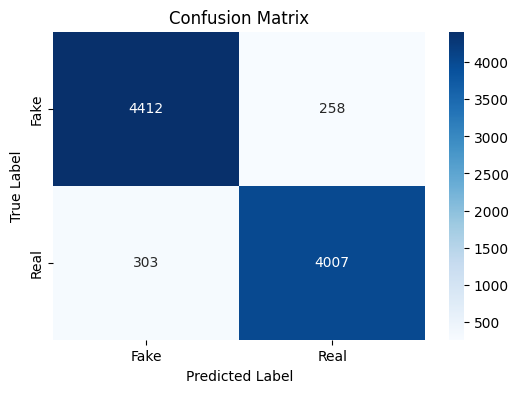

In [67]:
# Predict labels for the test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:\n")

report_dict=classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df)

# Print confusion matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
